## Regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import time
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_error,log_loss
from gammli.GAMMLI import GAMMLI
from gammli.DataReader import data_initialize
from gammli.utils import local_visualize
from gammli.utils import global_visualize_density
from gammli.utils import feature_importance_visualize
from gammli.utils import plot_trajectory
from gammli.utils import plot_regularization

import tensorflow as tf
tf.compat.v1.enable_eager_execution()
random_state = 0
data= pd.read_csv('demo_data/simulation_regression.csv')

#the best shrinkage is 0.917120
#the best combination is 0.600000

train , test = train_test_split(data,test_size=0.2 ,random_state=0)
task_type = "Regression"

meta_info = OrderedDict()

meta_info['uf_1']={'type': 'continues','source':'user'}
meta_info['uf_2']={'type': 'continues','source':'user'}
meta_info['uf_3']={'type': 'continues','source':'user'}
meta_info['uf_4']={'type': 'continues','source':'user'}
meta_info['uf_5']={'type': 'continues','source':'user'}
meta_info['if_1']={'type': 'continues','source':'item'}
meta_info['if_2']={'type': 'continues','source':'item'}
meta_info['if_3']={'type': 'continues','source':'item'}
meta_info['if_4']={'type': 'continues','source':'item'}
meta_info['if_5']={'type': 'continues','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
tr_x, tr_Xi, tr_y, tr_idx, te_x, te_Xi, te_y, val_x, val_Xi, val_y, val_idx, meta_info, model_info,sy,sy_t = data_initialize(train,test,meta_info,task_type ,'warm', random_state, True)


Memory usage of dataframe is 0.86 MB
Memory usage after optimization is: 0.26 MB
Decreased by 69.6%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.07 MB
Decreased by 69.6%
test cold start user: 0
test cold start item: 3
validation cold start user: 0
validation cold start item: 1


In [ ]:
model = GAMMLI(wc='warm',model_info=model_info, meta_info=meta_info, subnet_arch=[20, 10],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=min(500, int(0.2*tr_x.shape[0])), lr_bp=0.001, auto_tune=False,
               interaction_epochs=300,main_effect_epochs=1000,tuning_epochs=100,loss_threshold_main=0.01,loss_threshold_inter=0.1,combine_range=0.85,
              verbose=True, early_stop_thres=100,interact_num=10,u_group_num=30,i_group_num=50,scale_ratio=0.94,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=500,change_mode=True,convergence_threshold=0.001,max_rank=5,interaction_restrict='intra')
model.fit(tr_x, val_x, tr_y, val_y, tr_Xi, val_Xi, tr_idx, val_idx)

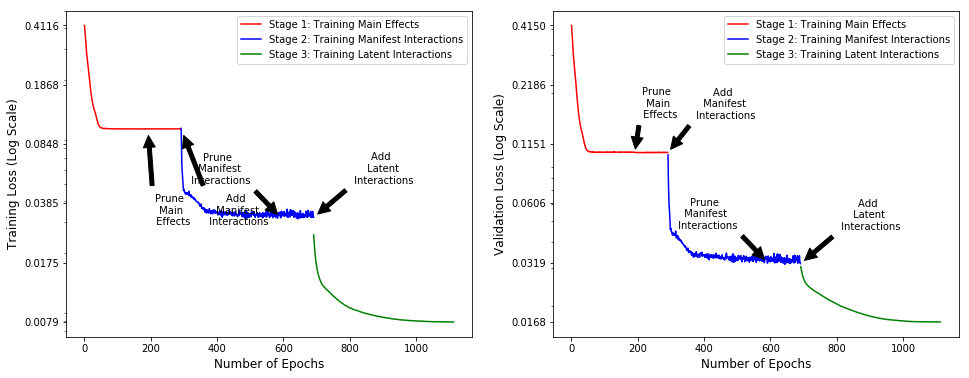

In [14]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=False, save_eps=False)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=False, save_eps=False)

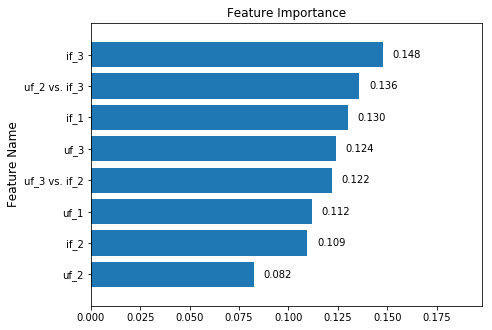

In [15]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False,threshold=0.03)
feature_importance_visualize(data_dict, save_png=True, folder=simu_dir, name='s1_feature')

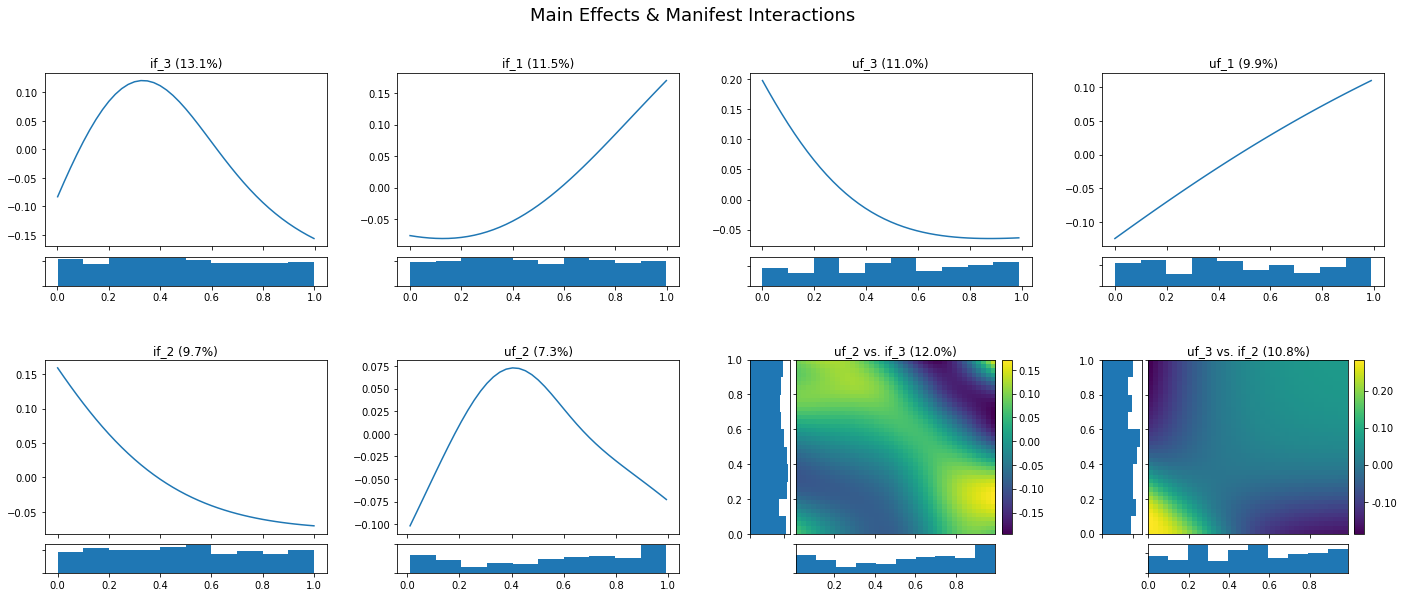

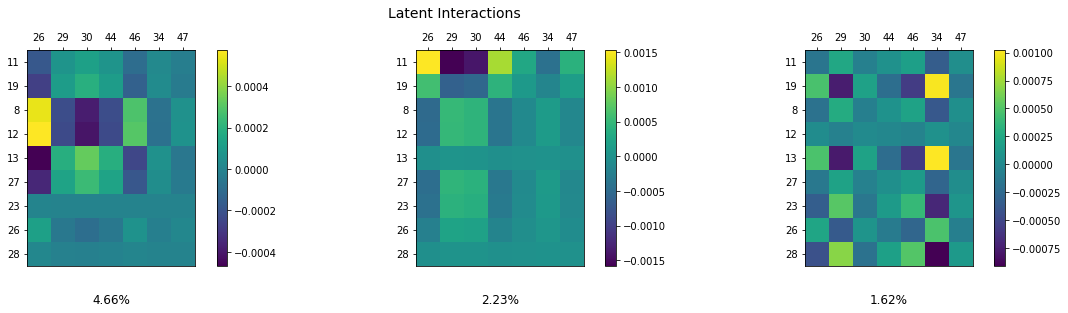

In [16]:
importance = model.get_all_rank(tr_Xi)
model.dash_board(data_dict, importance,simu_dir,False)

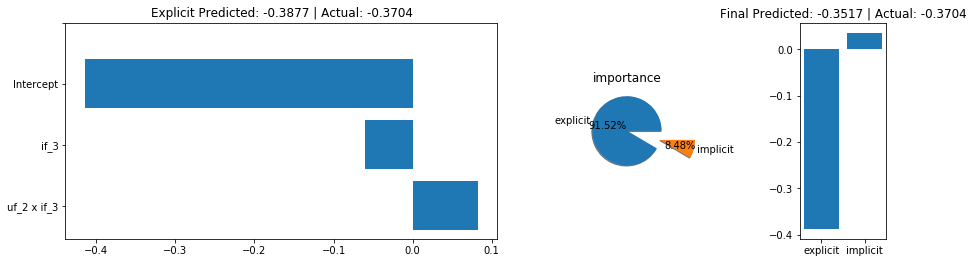

In [19]:
data_dict_local = model.local_explain(0,3,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_png=False, folder=simu_dir, name='s1_local',task_type="Regression")

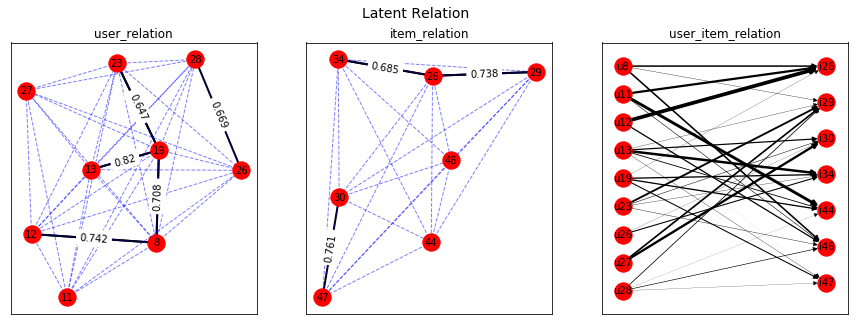

In [20]:
model.relation_plot(0.6,500,False)

In [21]:
new = te_x[100,:].reshape(1,-1)
_ = model.cold_start_analysis(new,'user',1.96)

The new user belong to group 8
 mean is [-0.10846383 -0.08666588 -0.04210369 -0.02981698 -0.00340162]
 and std is [0.0189392  0.02975271 0.02154975 0.0384592  0.02593252]
 the confidence interval is [[-0.14558466 -0.1449812  -0.0843412  -0.105197   -0.05422936],[-0.07134299 -0.02835056  0.00013382  0.04556304  0.04742612]]
